In [1]:
from sklearn import datasets, decomposition
from sklearn.linear_model import LogisticRegression
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
oli = datasets.fetch_olivetti_faces()

In [3]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oli.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [5]:
oli.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [6]:
oli.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [7]:
# NOTE: 64*64 = 4096  
# so 'data' contains features of all the images  

# Plotting images

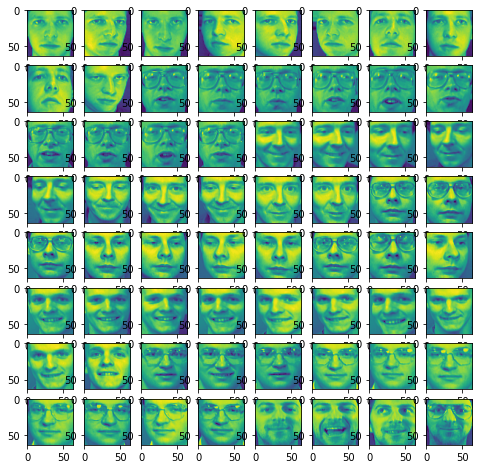

In [8]:
fig = plt.figure(figsize=(8, 8))       # ye sirf size diya hai figure ka
for i in range(64):                    # although there are 400 images but i am plotting only 64 images
    ax = fig.add_subplot(8, 8, i+1)    # now i want 8 rows and 8 columns to plot 64 images and in that 1 cell for each image
    ax.imshow(oli.images[i])
plt.show()

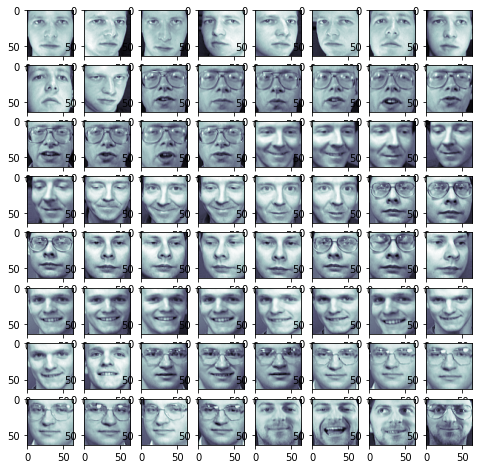

In [9]:
# to plot the natural image

fig = plt.figure(figsize=(8, 8))      
for i in range(64):                    
    ax = fig.add_subplot(8, 8, i+1)    
    ax.imshow(oli.images[i] , cmap=plt.cm.bone)
plt.show()

# Doing train-test split and transformation

In [10]:
x = oli.data
y = oli.target

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, random_state=0)

# choosing optimal value of k

In [12]:
pca = decomposition.PCA()
pca.fit_transform(x_train)
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total <= 0.99:
    current_variance += pca.explained_variance_[k] 
    k=k+1
k

209

# Applying PCA

In [13]:
pca = decomposition.PCA(n_components = k)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [14]:
x_train_pca.shape

(300, 209)

# ---------------------------------------------------------

In [15]:
# NOTE:  there is a feature called whiten in PCA , by default its False,  but we should try to use it as False one time , 
# and True one time , it sometimes help to improve the accuracy of model. 
# It is kind of feature scaling after applying PCA.
# when whiten is True it reduces the principal components to 0 mean and unit variance.  

In [16]:
pca1 = decomposition.PCA(n_components = k , whiten=True)
x_train_pca1 = pca1.fit_transform(x_train)
x_test_pca1 = pca1.transform(x_test)

In [17]:
x_train_pca1.shape

(300, 209)

# Applying logistic regression

In [18]:
alg = LogisticRegression()

start = time.time()
alg.fit(x_train_pca , y_train)
end = time.time()

total_time = end - start

print('accuracy : ', alg.score(x_test_pca , y_test))
print('time : ' , total_time)

accuracy :  0.97
time :  0.25531697273254395


C:\Users\snaug\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
alg1 = LogisticRegression()

start = time.time()
alg1.fit(x_train_pca1 , y_train)
end = time.time()

total_time = end - start

print('accuracy : ', alg1.score(x_test_pca1 , y_test))
print('time : ' , total_time)

accuracy :  0.93
time :  0.07879924774169922


# Reproducing images

In [20]:
x_approx = pca.inverse_transform(x_train_pca1)
x_approx.shape

(300, 4096)

In [21]:
x_train_pca1.shape

(300, 209)

In [22]:
# now to plot the data we need to reshape it to (300, 64, 64)
x_approx_images = x_approx.reshape((300, 64, 64))

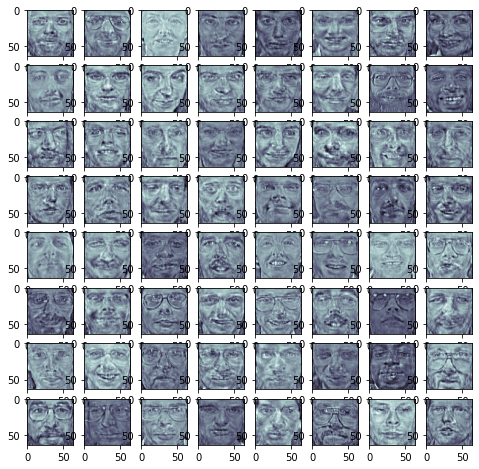

In [23]:
# to plot the natural image

fig = plt.figure(figsize=(8, 8))      
for i in range(64):                    
    ax = fig.add_subplot(8, 8, i+1)    
    ax.imshow(x_approx_images[i] , cmap=plt.cm.bone)
plt.show()